In [15]:
import pandas as pd
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import KFold
nb_classes = 4
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

In [2]:
# data_processed.csv
# load dataset
df = pd.read_csv('data_processed.csv')
# Get testSet
df_test = df.sample(frac=0.2, random_state=18)
df_test.to_csv('testSet.csv', index=False)
# Subtract to get trainingSet
df_train = df[~df.index.isin(df_test.index)]
df_train.to_csv('trainingSet.csv', index=False)

In [3]:
trainingSet = pd.read_csv('trainingSet.csv').sample(frac = 1, random_state=18)
testSet = pd.read_csv('testSet.csv').sample(frac = 1, random_state=18)

In [4]:
Y = np.array(trainingSet['Value'])
trainSet_X = trainingSet.drop('Value', axis=1)
X = np.array(trainSet_X)

In [5]:
# Y_test = np.array(testSet['Value'])
# testSet_X = testSet.drop('Value', axis=1)
# X_test = np.array(testSet_X)
# Y_test = Y_test - [1]

kf = KFold(n_splits=5)
kf.get_n_splits(X)
# K = [1,2,5,10,15,20,25,30,35,40,45,50]
K = [1,2,3,4,5,6,7,8,9,10,13,15,20,25]

train_dict = {}
test_dict = {}

for k in K:
    train_dict[k] = []
    test_dict[k] = []
    print 'k = ', k
    fold = 1
    for train_index, test_index in kf.split(X):
#         if fold == 5:
#             break
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        Y_train, Y_test = Y[train_index], Y[test_index]
        print Y_test
        # Learn the classifier
        clf = neighbors.KNeighborsClassifier(k, weights='uniform')
#         clf = neighbors.KNeighborsClassifier(k, weights='distance')

        clf.fit(X_train, Y_train)
        
#         Y_test = np.array(testSet['Value'])
#         testSet_X = testSet.drop('Value', axis=1)
#         X_test = np.array(testSet_X)
        
        # CV Result
        train_res = clf.predict(X_train)
        test_res = clf.predict(X_test)
        
        # Get train accuracy
        count = 0
        for i in range((len(X_train))):
            if train_res[i] == Y_train[i]:
                count += 1
        train_dict[k].append(1.0 * count/len(X_train))
        print 1.0 * count/len(X_train)
                             
        # Get test accuracy
        count = 0
        for i in range((len(X_test))):
            if test_res[i] == Y_test[i]:
                count += 1
        test_dict[k].append(1.0 * count/len(X_test))
        print 1.0 * count/len(X_test)
        fold += 1

k =  1
[1 2 1 1 1 1 3 1 1 1 2 2 1 1 2 4 1 3 1 2 1 1 2 1 1 1 1 1 1 1 1 1 4 4 1 2 1
 1 1 1 2 1 1 1 1 3 1 1 2 3 2 3 1 3 2 1 1 1 1 2 2 1 1 1 1 1 3 1 2 1 1 1 1 1
 2 2 2 2 2 1 4 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1
 2 2 2 1 1 2 1 1 1 1 2 1 1 3 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1
 1 1 1 1 2 3 1 2 1 1 1 3 2 4 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 1 1 2 3 3 1 1 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 3 1 3 1 1 1 2
 4 1 2 1 1 1 2]
1.0
0.825327510917
[2 3 4 1 1 1 1 1 1 1 2 2 1 4 1 3 1 2 1 1 2 1 1 2 1 2 1 3 1 1 2 2 1 2 1 2 2
 1 1 1 3 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 3 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1
 3 1 2 3 2 1 1 1 1 1 1 1 4 2 1 1 2 3 3 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 4 2 2 1 1 1 2 1 1 1 1 1 1 1
 1 1 2 1 2 2 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 3 1 2 1 1 1 1 1 1 3 1 2 1 1 2
 4 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 4 1 1 1 1
 1 1 1 1 1 1]
1.0
0.837719298246
[1 1 1 1 1 1 1 1 1 1 1 1 

0.893756845564
0.859649122807
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 3 2 1 2 1 1 1
 4 2 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1
 4 1 2 2 1 3 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 4 1 1 1 1 1 2
 2 2 3 1 2 1 3 1 1 2 1 1 1 1 1 1 1 1 1 1 2 3 3 1 1 1 1 1 1 1 4 1 2 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 2 1 1 3 1 1 1 2 1 4 1 1 1 3 1 1 1 1 1 1 1 2 1 1 2 1 2
 1 1 2 2 1 2 3 2 1 1 1 1 1 2 2 1 3 2 1 1 3 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 4 2 1 1 2]
0.894852135816
0.855263157895
[1 1 1 1 1 1 4 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 2 1 3 1 1 1 1 2 3 1
 2 1 1 1 1 3 2 3 1 1 3 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 3 1 1 1 1 2 1 2 1 1 1
 2 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 2 1 3 1 1 1 1 2 2 1
 2 1 1 1 1 4 1 3 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2
 1 1 1 1 1 1 2 2 2 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 4 1 2 1 1 1 1 1 1 1 1
 1 1 1 2 1 1]
0.9014238773

0.898138006572
0.890350877193
[1 1 3 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 3 1 3 1 1 4 3 3 1 1 2 2 1 1
 2 1 1 3 2 1 2 2 1 1 2 1 3 3 1 3 2 2 1 1 2 2 2 1 1 2 1 1 4 2 1 1 2 1 2 1 1
 2 1 2 1 2 1 2 2 2 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 2 2 2 3 1 4 2 1 1
 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 4 1 2 2 1 1 2 2 1 1 1 1 1
 4 3 2 2 4 1 3 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 3 4 1 1 2 1 2 1
 1 1 2 1 2 1 2 1 1 2 1 4 1 2 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 2 1 1 1 2
 1 1 1 1 2 1]
0.900328587076
0.811403508772
k =  8
[1 2 1 1 1 1 3 1 1 1 2 2 1 1 2 4 1 3 1 2 1 1 2 1 1 1 1 1 1 1 1 1 4 4 1 2 1
 1 1 1 2 1 1 1 1 3 1 1 2 3 2 3 1 3 2 1 1 1 1 2 2 1 1 1 1 1 3 1 2 1 1 1 1 1
 2 2 2 2 2 1 4 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 2 1 1 1
 2 2 2 1 1 2 1 1 1 1 2 1 1 3 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 1 1 1 1
 1 1 1 1 2 3 1 2 1 1 1 3 2 4 2 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 1 1 2 3 3 1 1 2 1 1 1 1 2 1 2 1 1 1 1 2 2 1 1 1 3 1 3 1 1 1 2
 4 1 2 1 1 1 2]
0.8

0.879385964912
0.851528384279
[2 3 4 1 1 1 1 1 1 1 2 2 1 4 1 3 1 2 1 1 2 1 1 2 1 2 1 3 1 1 2 2 1 2 1 2 2
 1 1 1 3 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 1 3 1 1 2 1 1 2 1 1 2 1 1 1 2 1 1
 3 1 2 3 2 1 1 1 1 1 1 1 4 2 1 1 2 3 3 1 1 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 1 1 2 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 4 2 2 1 1 1 2 1 1 1 1 1 1 1
 1 1 2 1 2 2 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 3 1 2 1 1 1 1 1 1 3 1 2 1 1 2
 4 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1 1 4 1 1 1 1
 1 1 1 1 1 1]
0.869660460022
0.855263157895
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 2 1 1 2 1 1 1 3 2 1 2 1 1 1
 4 2 2 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 2 2 1 2 1 1 1 1 1 1 1
 4 1 2 2 1 3 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 4 1 1 1 1 1 2
 2 2 3 1 2 1 3 1 1 2 1 1 1 1 1 1 1 1 1 1 2 3 3 1 1 1 1 1 1 1 4 1 2 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 2 1 1 3 1 1 1 2 1 4 1 1 1 3 1 1 1 1 1 1 1 2 1 1 2 1 2
 1 1 2 2 1 2 3 2 1 1 1 1 1 2 2 1 3 2 1 1 3 2 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1
 1 4 2 1 1 2]
0.8838992332

0.843373493976
0.850877192982
[1 1 1 1 1 1 4 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 1 2 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 3 1 1 2 1 3 1 1 1 1 2 3 1
 2 1 1 1 1 3 2 3 1 1 3 1 1 1 1 1 1 1 2 1 2 1 1 1 1 2 3 1 1 1 1 2 1 2 1 1 1
 2 1 1 1 1 2 1 2 2 1 2 1 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 2 1 3 1 1 1 1 2 2 1
 2 1 1 1 1 4 1 3 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 2 1 1 1 2 1 1 2 1 1 1 1 2
 1 1 1 1 1 1 2 2 2 3 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 4 1 2 1 1 1 1 1 1 1 1
 1 1 1 2 1 1]
0.846659364732
0.864035087719
[1 1 3 1 2 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 3 1 3 1 1 4 3 3 1 1 2 2 1 1
 2 1 1 3 2 1 2 2 1 1 2 1 3 3 1 3 2 2 1 1 2 2 2 1 1 2 1 1 4 2 1 1 2 1 2 1 1
 2 1 2 1 2 1 2 2 2 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 3 2 1 1 2 2 2 3 1 4 2 1 1
 2 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 4 1 2 2 1 1 2 2 1 1 1 1 1
 4 3 2 2 4 1 3 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 3 4 1 1 2 1 2 1
 1 1 2 1 2 1 2 1 1 2 1 4 1 2 1 1 2 1 1 1 1 1 1 1 1 2 2 2 2 2 1 1 2 1 1 1 2
 1 1 1 1 2 1]
0.8565169769

In [6]:
print train_dict
print test_dict

train_accuracy = []
train_stdrr = []
test_accuracy = []
test_stdrr = []
for k in K:
    train_accuracy.append(np.mean(train_dict[k]))
    train_stdrr.append(np.std(train_dict[k]) / np.sqrt(5))
    test_accuracy.append(np.mean(test_dict[k]))
    test_stdrr.append(np.std(test_dict[k]) / np.sqrt(5))
print train_accuracy
print train_stdrr
print test_accuracy
print test_stdrr

{1: [1.0, 1.0, 1.0, 1.0, 1.0], 2: [0.9046052631578947, 0.9090909090909091, 0.9123767798466593, 0.9112814895947426, 0.91894852135816], 3: [0.9243421052631579, 0.9178532311062432, 0.9233296823658269, 0.9255202628696605, 0.9353778751369113], 4: [0.893640350877193, 0.8937568455640745, 0.8948521358159912, 0.9014238773274917, 0.9036144578313253], 5: [0.9067982456140351, 0.9025191675794085, 0.9079956188389924, 0.9069003285870756, 0.9003285870755751], 6: [0.8848684210526315, 0.8773274917853231, 0.8970427163198248, 0.8904709748083242, 0.8860898138006572], 7: [0.8881578947368421, 0.8838992332968236, 0.8992332968236583, 0.8981380065717415, 0.9003285870755751], 8: [0.875, 0.872946330777656, 0.8882803943044907, 0.8817086527929902, 0.8860898138006572], 9: [0.8859649122807017, 0.8740416210295728, 0.8860898138006572, 0.8893756845564075, 0.8904709748083242], 10: [0.8728070175438597, 0.864184008762322, 0.882803943044907, 0.872946330777656, 0.8806133625410734], 13: [0.8793859649122807, 0.8696604600219058

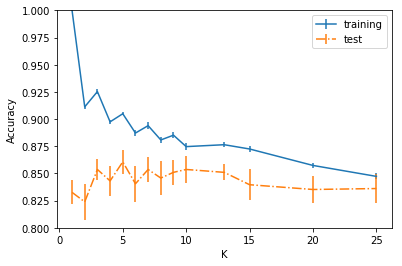

In [7]:
plt.figure()
plt.errorbar(K, train_accuracy, train_stdrr, label='training', linestyle='-')
plt.errorbar(K, test_accuracy, test_stdrr, label='test', linestyle='-.')
plt.ylim((0.80, 1.00))
plt.xlabel('K')
plt.ylabel('Accuracy')

plt.legend()
plt.savefig('./KNN-distance.pdf')
plt.show()

In [8]:
Y = np.array(testSet['Value'])
testSet_X = testSet.drop('Value', axis=1)
X = np.array(testSet_X)

In [9]:
clf = neighbors.KNeighborsClassifier(5, weights='uniform')
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
res = clf.predict(X)
CM  = np.zeros((4, 4))
print res

[1 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1
 1 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 1 1 3 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 3 3 1
 1 1 1 1 3 1 1 2 1 1 1 1 1 2 1 1 2 2 1 1 1 1 1 2 1 2 2 1 2 2 1 2 1 2 1 2 2
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 4 1 1 2 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 1 1 3 1 1 3 1 1 1 2 1 1 1 1 1 1 4 1 1 1 1 1 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 1 1 2 2 3 1 1 2 1 4 1 1 1 1 1 1 1 1 2 3 1 2 1 1 2 1 4 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 2 1 2 1 1 1 1 1 1 2 2 2 2 2 1 1 1 2 1 1 1 1 2 1 3 1 2 4 3 2
 1 1 1 1 1 3 1 2 2 1 3 1 1 1 2 1 2 1 4 1 1 1 2 1 1 1]


In [13]:
for i in range((len(X))):
    CM[res[i]-1][Y[i]-1] += 1
print CM

[[193.  18.   0.   0.]
 [  4.  34.  14.   3.]
 [  0.   1.   4.   8.]
 [  0.   0.   4.   2.]]


In [16]:
print f1_score(res,Y,average='macro')

0.5037014513407703


In [17]:
print f1_score(res,Y,average='micro')

0.8175438596491228
